# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:  The input what receives input from the dataset, the visible layer, the only layer that interacts directly with our dataset.

### Hidden Layer:  Layers after the Input Layer.  We don't get to directly interact with this layer.  

### Output Layer:  The final layer of the neural network that outputs a vector of values suitable for the problem we're trying to solve.  The outputl layer in a classification problem has been modified by an activation function (i.e. sigmoid / Relu).

### Neuron:  The structure of brain cells that a neural network is trying to emulate into computer algorithms which can make predictions.

### Weight:  The values that are learned by the neural network that modify the inputs as we go from input layer to hidden layer and then to the final layer that help to make predictions.

### Activation Function:  A decision function that decides how much signal to pass onto the next layer.  They can be like the step function...Everything equal to or greater than 0 is given 1, otherwise 0.

### Node Map:  A visual diagram of the architecture or "topology" of the neural network.  Like a flowchart that shows the path from inputs to output.

### Perceptron:  The simplest and first neural network developed by Frank Rosenblatt.  A single node or neuron of a neural network and nothing else.  

### Bias:  An "extra" neuron added to each pre-output Layer that stores the value of 1.  

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

Data is fed through to the Input Layer.  An algorithm then initializes the weights with some random values and bias is added.  The weights are multiplied with the X values and added together to get a net-input value to which the algorithm applies a threshold or activation function.  If the the net-input value meets a certain threshold the model predicts a postive 1 or a negative 0 (or 1s and -1s).  The errors (actual values minus predicted values) are calculated, and then weights are adjusted so that that the errors decrease and are pushed toward the correct prediction using something like the Perceptron Rule.  This process continues until the errors equal 0 after so many epochs or the model iterates to the maximum epochs set by the user of the model. 

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [40]:
import pandas as pd

df = pd.DataFrame({'x1': [0, 1, 0, 1],
                  'x2': [0, 0, 1, 1],
                  'y': [1, 1, 1, 0]})
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [57]:
##### Your Code Here #####
import numpy as np

class Perceptron(object):
	"""Perceptron classifier

	Parameters
	-----------
	eta: float
		Learning rate (between 0.0 and 1.0)
	n_iter: int
		Passes over the training dataset
	random_state: int
		Random number generator seed for random weight
		initialization

	Attributes
	-----------
	w_: 1d-array
		Weights afer fitting
	errors_ : list
		Numbe of misclassifications (updates) in each epoch

	"""
	def __init__(self, eta=0.01, n_iter=50, random_state=42):
		self.eta = eta
		self.n_iter = n_iter
		self.random_state = random_state

	def fit(self, X, y):
		"""Fit training data

		Parameters
		-----------
		X: {array-like}, shape = [n_samples, n_features]
			Training vectors, where n_samples is the number of samples
			and n_features is the number of features.
		y: array-like, shape = [n_samples]
			Target values.

		Returns
		--------
		self: object

		"""
		rgen = np.random.RandomState(self.random_state)
		self.w_ = rgen.normal(loc=0.0, scale=0.01,
			size=1 + X.shape[1])

		self.errors_ = []

		for _ in range(self.n_iter):
			errors = 0
			for xi, target in zip(X, y):
				update = self.eta * (target - self.predict(xi))
				self.w_[1:] += update * xi
				self.w_[0]  += update
				errors += int(update != 0.0)
			self.errors_.append(errors)
		return self

	def net_input(self, X):
		"""Calculates net input"""
		return np.dot(X, self.w_[1:] + self.w_[0])

	def predict(self, X):
		"""Return class label after unit step"""
		return np.where(self.net_input(X) >= 0.0, 1, 0)

In [58]:
X = df.loc[:, ['x1', 'x2']].values
y = df.loc[:, 'y'].values
# y = np.where(y == 0, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=100000)
ppn.fit(X, y)

In [59]:
print(ppn.predict([[0, 0]]))
print(ppn.predict([[1, 0]]))
print(ppn.predict([[0, 1]]))
print(ppn.predict([[1, 1]]))

[1]
[1]
[0]
[0]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [62]:
##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
X = df.loc[:, 'Pregnancies':'Age'].values
y = df.loc[:, 'Outcome'].values
y = np.where(y == 1, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

Text(0, 0.5, 'Number of updates')

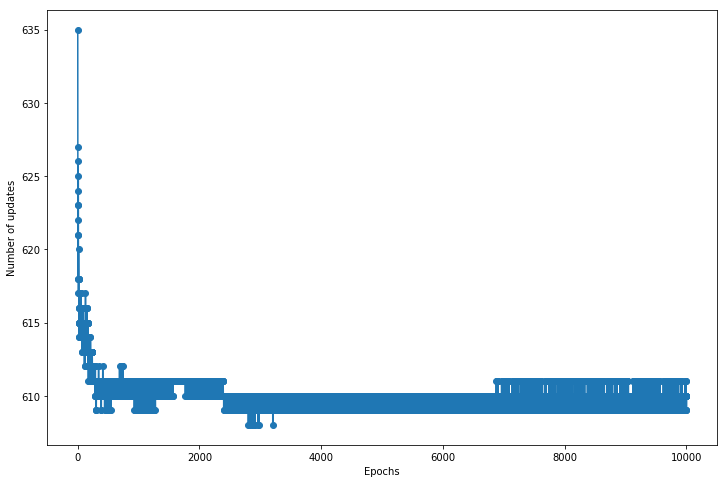

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

ax, fig = plt.subplots(figsize=(12, 8))
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [76]:
from sklearn.metrics import accuracy_score

X = df.loc[:, 'Pregnancies':'Age'].values
y = df.loc[:, 'Outcome'].values
# y = np.where(y == 1, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=5000)

ppn.fit(X, y)
y_preds = ppn.predict(X)

print("Accuracy Score: {:.2f}".format(accuracy_score(y, y_preds)))

Accuracy Score: 0.68


In [77]:
# This model does just microscopically better than the majority class

df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?